# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [65]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

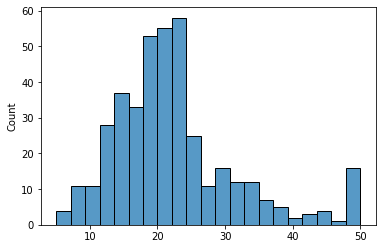

In [31]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

sns.histplot(y_train)

In [32]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [33]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [34]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X_train)
X_scaled
#avoid data leakage by fitting only the X train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [35]:
# YOUR CODE HERE
y_test.shape


(102,)

In [36]:
s =y_test.mean()
s

23.07843137254902

In [37]:
from sklearn.metrics import mean_absolute_error
import numpy as np 
y_pred = np.full(y_test.shape,s) 


In [64]:
score_baseline = mean_absolute_error(y_pred, y_test)
score_baseline
#moyenne des valeurs absolues de la différence entre les valeurs y_test et y_pred

6.5990003844675105

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [55]:
X_train.shape

(404, 13)

In [58]:
#input dim le nombre d'arguments est le nbr de features
def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_dim= 13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    return model  # YOUR CODE HERE

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def compile_model(model, optimizer_name):
    model.compile(loss='mse',
    optimizer=optimizer_name,
    metrics=['mae'])
    
    return model

  # YOUR CODE HERE

In [60]:
model = compile_model(initialize_model(),'adam')

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

history =model.fit(X_train, y_train, 
          batch_size=16, 
          epochs=100, 
          validation_split=0.3,
          callbacks=[es])  # YOUR CODE HERE

result = model.evaluate(X_train, y_train, verbose=0)

Epoch 1/100
18/18 [==============================] - 0s 5ms/step - loss: 39.1922 - mae: 4.3245 - val_loss: 74.5575 - val_mae: 5.6279
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 38.5587 - mae: 4.1590 - val_loss: 71.5219 - val_mae: 5.7836
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 39.2304 - mae: 4.5846 - val_loss: 77.0576 - val_mae: 5.6096
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 39.2842 - mae: 4.1881 - val_loss: 70.6539 - val_mae: 6.0736
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 39.1588 - mae: 4.4813 - val_loss: 76.0855 - val_mae: 5.6083
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 38.2845 - mae: 4.2218 - val_loss: 70.1818 - val_mae: 5.7659
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 37.8318 - mae: 4.2227 - val_loss: 71.2250 - val_mae: 5.6700
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - lo

18/18 [==============================] - 0s 4ms/step - loss: 29.3429 - mae: 3.8866 - val_loss: 53.1154 - val_mae: 5.2778
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 28.8892 - mae: 3.8713 - val_loss: 55.9395 - val_mae: 5.0468
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 30.1520 - mae: 4.0364 - val_loss: 56.0225 - val_mae: 5.0256
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 29.8550 - mae: 3.8894 - val_loss: 52.5276 - val_mae: 5.5146
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 29.5169 - mae: 3.9018 - val_loss: 52.6295 - val_mae: 5.1382
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 29.1024 - mae: 3.9264 - val_loss: 53.9051 - val_mae: 5.0271
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 28.7985 - mae: 3.9169 - val_loss: 53.0901 - val_mae: 5.0768
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 2

In [106]:
result = model.evaluate(X_train, y_train, verbose=0)
result[1]
#a comparer à mon baseline plus haut

6.54643440246582

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [67]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

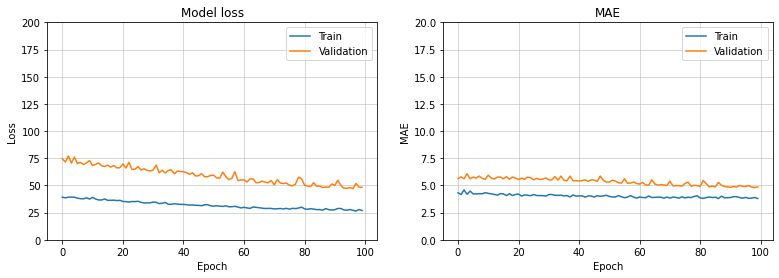

In [73]:
plot_loss_mae(history)

---------------------------Adadelta---------------------------------


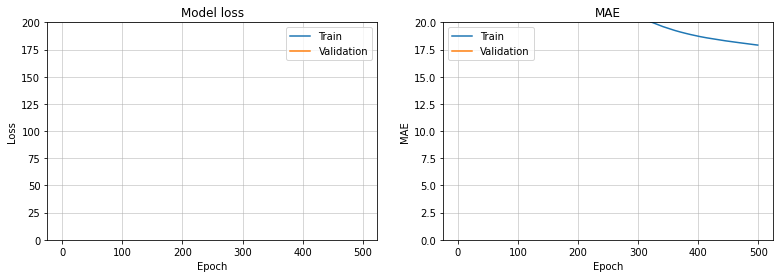

---------------------------Adagrad---------------------------------


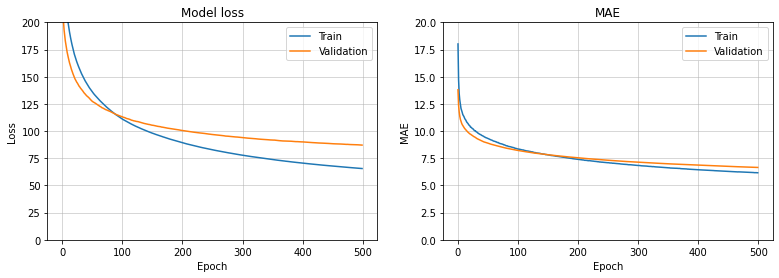

---------------------------Adamax---------------------------------


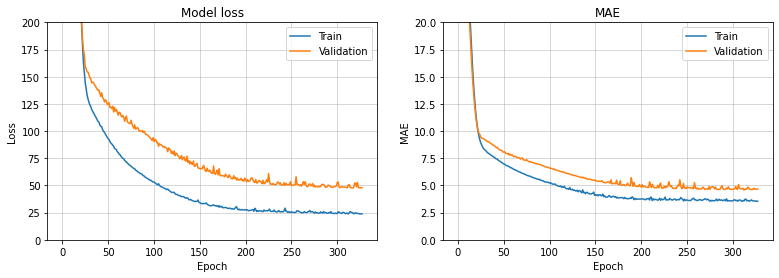

---------------------------Adam---------------------------------


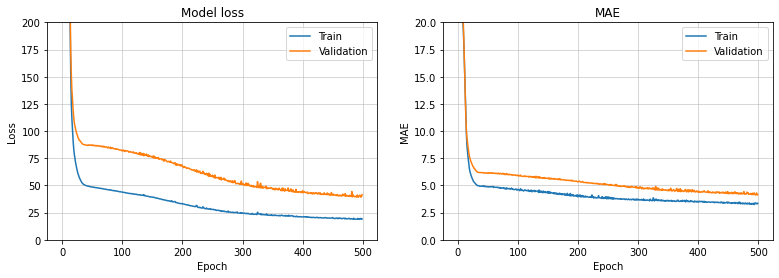

---------------------------Ftrl---------------------------------


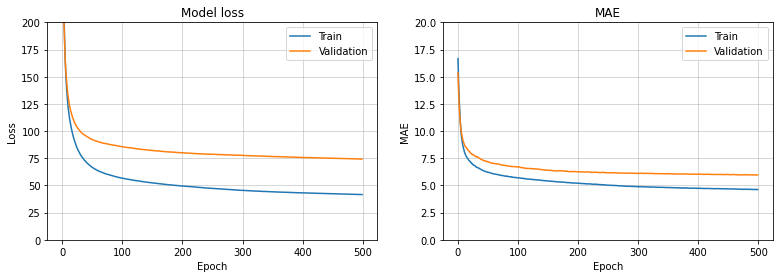

---------------------------Nadam---------------------------------


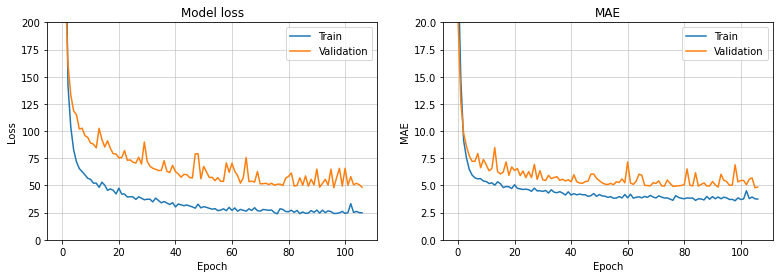

---------------------------rmsprop---------------------------------


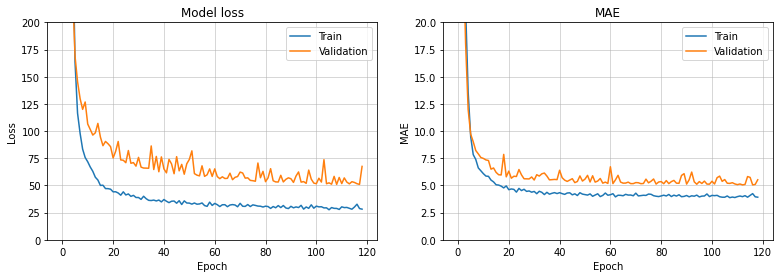

---------------------------sgd---------------------------------


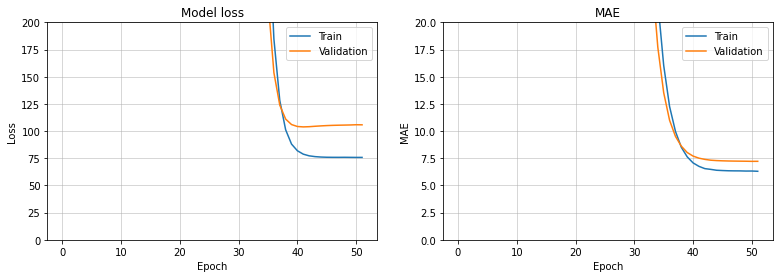

In [79]:
optim = ['Adadelta','Adagrad', 'Adamax', 'Adam', 'Ftrl', 'Nadam', 'rmsprop', 'sgd']
mae = {}
for optimizer in optim:
    es = EarlyStopping(patience=10, restore_best_weights=True)
    model = compile_model(initialize_model(), optimizer)
    history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16,
                    verbose=0,
                    callbacks=[es])
    results = model.evaluate(X_test, y_test, verbose=0)
    mae[optimizer] = results[1]
    results = model.evaluate(X_test, y_test, verbose=0)
    print(f'---------------------------{optimizer}---------------------------------')
    plot_loss_mae(history)

---------------------------Adadelta---------------------------------


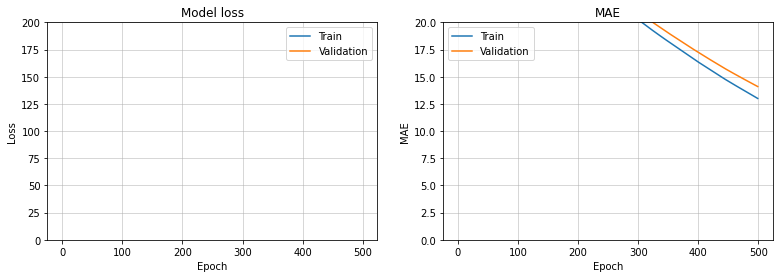

---------------------------Adagrad---------------------------------


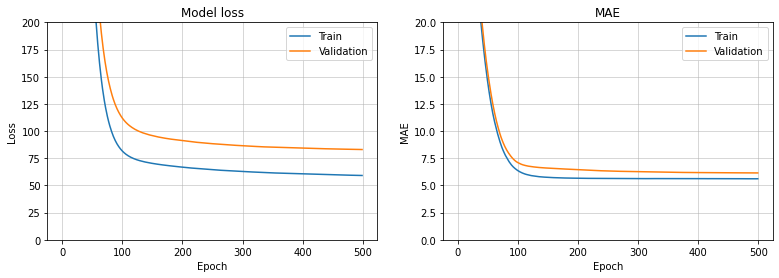

---------------------------Adamax---------------------------------


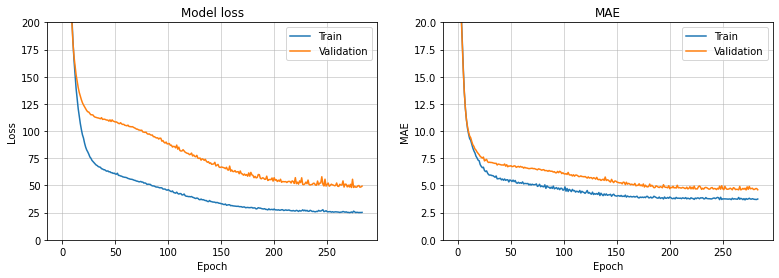

---------------------------Adam---------------------------------


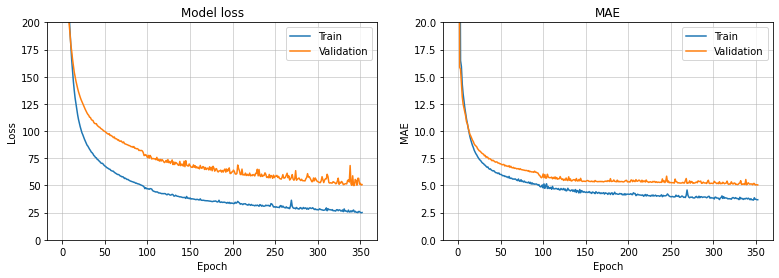

---------------------------Ftrl---------------------------------


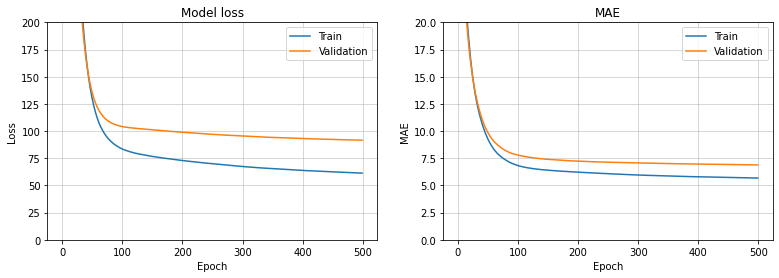

---------------------------Nadam---------------------------------


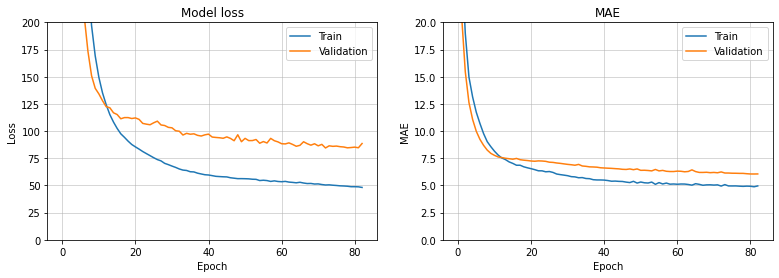

---------------------------rmsprop---------------------------------


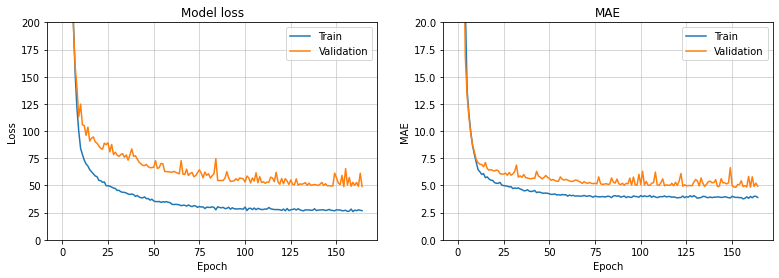

---------------------------sgd---------------------------------


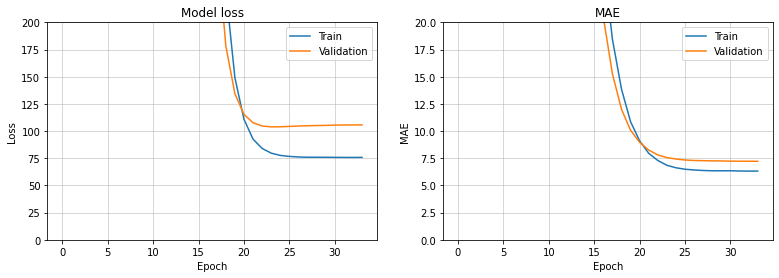

In [81]:
optim = ['Adadelta','Adagrad', 'Adamax', 'Adam', 'Ftrl', 'Nadam', 'rmsprop', 'sgd']

for optimizer in optim:
    es = EarlyStopping(patience=10, restore_best_weights=True)
    model = compile_model(initialize_model(), optimizer)
    history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    epochs=500,
                    batch_size=16,
                    verbose=0,
                    callbacks=[es])
    results = model.evaluate(X_test, y_test, verbose=0)
    results = model.evaluate(X_test, y_test, verbose=0)
    print(f'---------------------------{optimizer}---------------------------------')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

> no

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [87]:
# YOUR CODE HERE
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.1)
model = compile_model(model,adam)
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_73 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 3ms/step - loss: 48.3205 - mae: 4.9753
MAE with a learning rate of 0.0001 optimizer: 4.9753


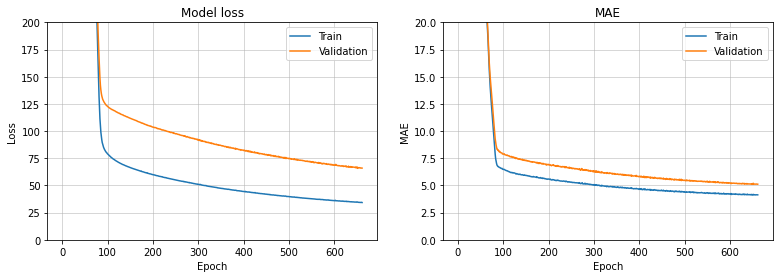

4/4 [==============================] - 0s 2ms/step - loss: 36.1552 - mae: 4.2821
MAE with a learning rate of 0.001 optimizer: 4.2821


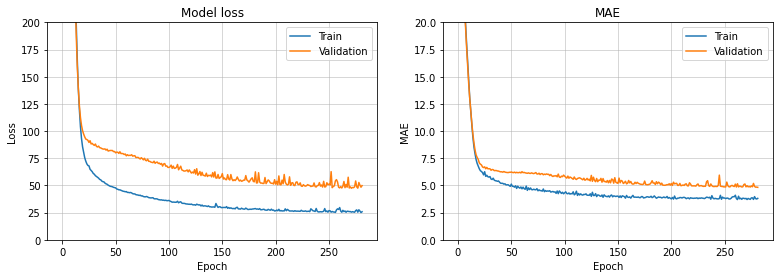

4/4 [==============================] - 0s 1ms/step - loss: 34.0733 - mae: 4.1832
MAE with a learning rate of 0.01 optimizer: 4.1832


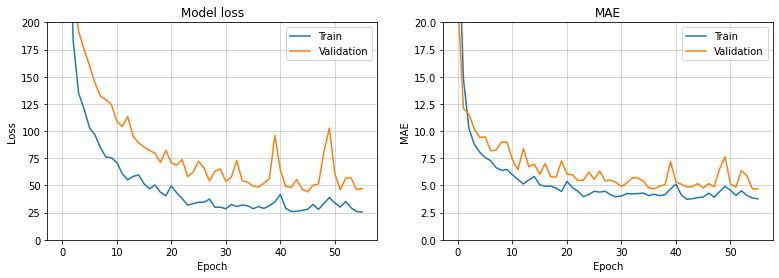

4/4 [==============================] - 0s 1ms/step - loss: 35.9523 - mae: 4.4653
MAE with a learning rate of 0.1 optimizer: 4.4653


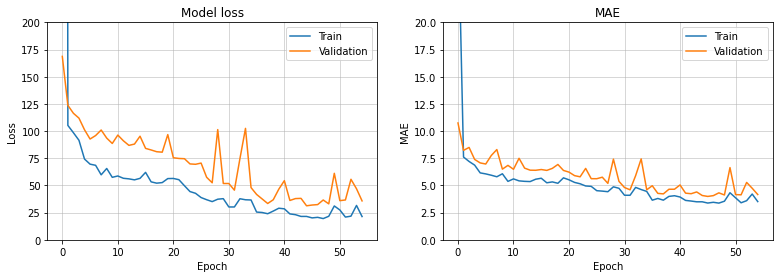

4/4 [==============================] - 0s 2ms/step - loss: 84.4171 - mae: 6.5137
MAE with a learning rate of 1 optimizer: 6.5137


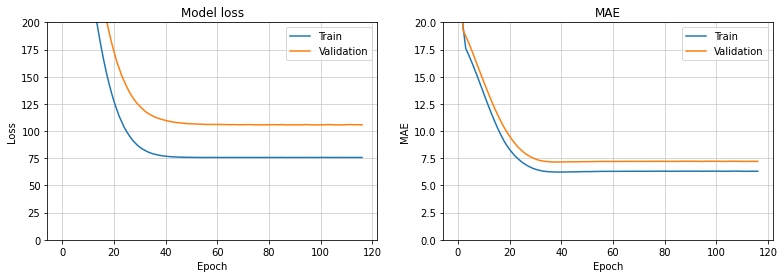

4/4 [==============================] - 0s 2ms/step - loss: 83.2542 - mae: 6.6145
MAE with a learning rate of 5 optimizer: 6.6145


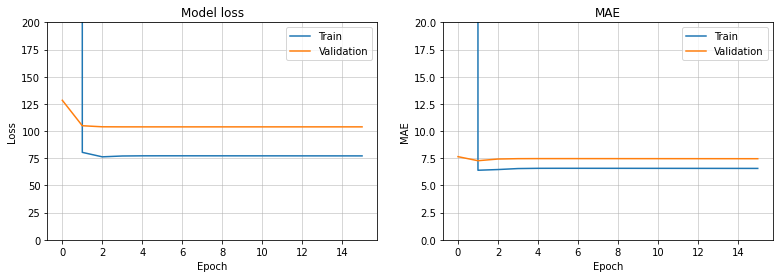

In [109]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    adam = Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model,adam)
    es = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=1000, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]

    print(f'MAE with a learning rate of {lr} optimizer: {res:.4f}')
    plot_loss_mae(history)


  # YOUR CODE HERE


# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [110]:
# YOUR CODE HERE
model = initialize_model()
model.compile(loss='mae', optimizer='adam', metrics=['mse'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

In [111]:
res = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 4.8481 - mse: 50.2798


In [113]:
print(f"MAE_train : {min(history.history['loss']):.4f} - MSE_train : {min(history.history['mse']):.4f}")
print(f"MAE_val : {min(history.history['val_loss']):.4f} - MSE_val : {min(history.history['val_mse']):.4f}")
print(f"MAE_test : {res[0]:.4f} - MSE_val : {res[1]:.4f}")

MAE_train : 3.8363 - MSE_train : 33.3727
MAE_val : 5.1319 - MSE_val : 60.7104
MAE_test : 4.8481 - MSE_val : 50.2798


In [114]:
model = initialize_model()
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, 
                  batch_size=16, 
                  epochs=1000, 
                  validation_split=0.3,
                  callbacks=[es], verbose=0)

In [115]:
res = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")
print(f"MAE_test : {res[1]:.4f} - MSE_val : {res[0]:.4f}")

MAE_train : 3.5758 - MSE_train : 24.9356
MAE_val : 4.8751 - MSE_val : 49.4053
MAE_test : 4.1071 - MSE_val : 34.2180


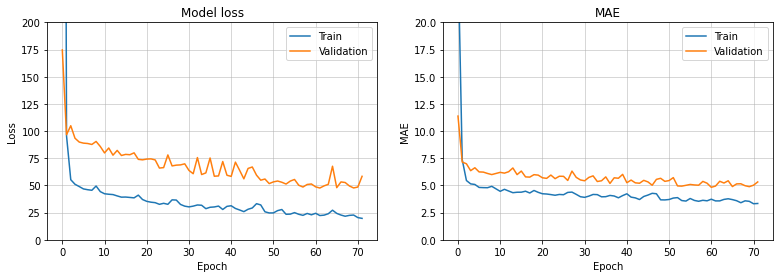

MAE_train : 3.3170 - MSE_train : 19.7096
MAE_val : 4.8296 - MSE_val : 47.6317


In [116]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=13))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


# Compile
initial_learning_rate = 0.01 # start with default ADAM value

from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=2000, decay_rate=0.5)

adam = Adam(learning_rate=lr_schedule)

model = compile_model(model, adam)

# Fit Model
es = EarlyStopping(patience=10)

history = model.fit(X_train, y_train, validation_split=0.3,
                  batch_size=16, epochs=1000,
                  callbacks=[es], verbose=0)

plot_loss_mae(history)
print(f"MAE_train : {min(history.history['mae']):.4f} - MSE_train : {min(history.history['loss']):.4f}")
print(f"MAE_val : {min(history.history['val_mae']):.4f} - MSE_val : {min(history.history['val_loss']):.4f}")

In [120]:
s = model.evaluate(X_test, y_test)[1]
s

4/4 [==============================] - 0s 2ms/step - loss: 41.8603 - mae: 4.7275


4.727518558502197

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [121]:
# YOUR CODE HERE
mae_test = 3.0992870330810547

In [122]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/06-Deep-Learning/02-Optimizer-loss-and-fitting/03-Finetune-your-Neural-Network
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_solution.py::TestSolution::test_is_score_ok PASSED            [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master


# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

In [0]:
# YOUR CODE HERE

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [0]:
# YOUR CODE HERE

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [0]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

pass  # YOUR CODE HERE